In [ ]:
# Programa para leer el archivo de texto.

def leer_posiciones(filename):
    posiciones = []  # Lista para almacenar las posiciones de cada paso temporal

    with open(filename, 'r') as file:
        paso_actual = []  # Lista temporal para almacenar las posiciones de un paso temporal

        for linea in file:
            linea = linea.strip()
            if linea:  # Si la línea no está vacía
                datos = linea.split(",")  # Dividimos por coma
                r1x, r1y = float(datos[0]), float(datos[1])  # Tomamos las dos primeras columnas
                paso_actual.append((r1x, r1y))
            else:  # Si encontramos una línea vacía, significa que termina un paso temporal
                if paso_actual:  # Si hay datos en el paso actual
                    posiciones.append(paso_actual)
                    paso_actual = []  # Reiniciamos para el siguiente paso temporal

        # Añadimos el último paso si no está vacío
        if paso_actual:
            posiciones.append(paso_actual)

    return posiciones

Video guardado como 'simulacion.mp4'.


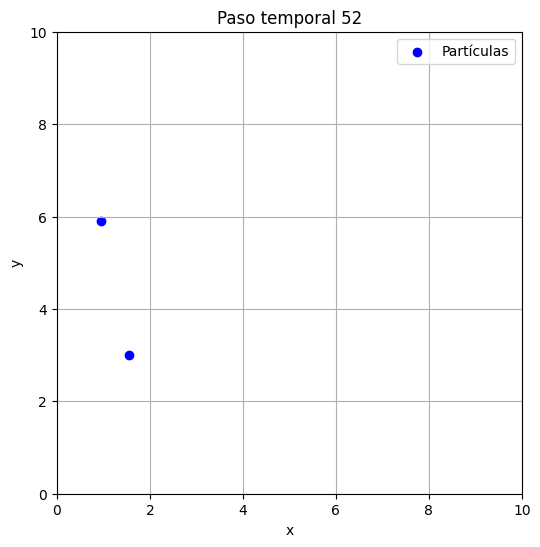

In [3]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import matplotlib.animation as animation

# Función para leer las posiciones
def leer_posiciones(filename):
    posiciones = []  # Lista para almacenar las posiciones de cada paso temporal

    with open(filename, 'r') as file:
        paso_actual = []  # Lista temporal para almacenar las posiciones de un paso temporal

        for linea in file:
            linea = linea.strip()
            if linea:  # Si la línea no está vacía
                datos = linea.split(",")  # Dividimos por coma
                r1x, r1y = float(datos[0]), float(datos[1])  # Tomamos las dos primeras columnas
                paso_actual.append((r1x, r1y))
            else:  # Si encontramos una línea vacía, significa que termina un paso temporal
                if paso_actual:  # Si hay datos en el paso actual
                    posiciones.append(paso_actual)
                    paso_actual = []  # Reiniciamos para el siguiente paso temporal

        # Añadimos el último paso si no está vacío
        if paso_actual:
            posiciones.append(paso_actual)

    return posiciones

# Función para crear la animación
def crear_animacion(posiciones, caja_lado=10, intervalo=200, guardar_gif=False, guardar_video=False):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim(0, caja_lado)
    ax.set_ylim(0, caja_lado)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title("Simulación de partículas")
    scatter = ax.scatter([], [], c='blue', label="Partículas")
    ax.legend()
    ax.grid(True)

    # Función para actualizar los datos en cada frame
    def actualizar(frame):
        paso = posiciones[frame]
        x = [pos[0] for pos in paso]
        y = [pos[1] for pos in paso]
        scatter.set_offsets(list(zip(x, y)))
        ax.set_title(f"Paso temporal {frame + 1}")

    # Crear la animación
    anim = FuncAnimation(fig, actualizar, frames=len(posiciones), interval=intervalo)

    # Guardar como GIF si se solicita
    if guardar_gif:
        gif_writer = PillowWriter(fps=1000 // intervalo)
        anim.save("simulacion.gif", writer=gif_writer)
        print("GIF guardado como 'simulacion.gif'.")

    # Guardar como video si se solicita
    if guardar_video:
        video_writer = animation.FFMpegWriter(fps=1000 // intervalo)
        anim.save("simulacion.mp4", writer=video_writer)
        print("Video guardado como 'simulacion.mp4'.")

    plt.show()

# Ejemplo de uso
if __name__ == "__main__":
    archivo = "SALIDA.txt"  # Nombre del archivo de salida generado por el programa en C
    posiciones = leer_posiciones(archivo)

    # Crear la animación
    # Cambia `guardar_gif` o `guardar_video` a True si deseas guardar la animación
    crear_animacion(posiciones, caja_lado=10, intervalo=200, guardar_gif=False, guardar_video=True)